In [48]:
import pandas as pd
import numpy as np

import re

from datetime import datetime
import jdatetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading the dataset
data = pd.read_csv('house_prices.csv')

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['area', 'bedrooms', 'bathrooms']], data['price'], test_size=0.2, random_state=0)

# Creating a Linear Regression model and fitting it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the house prices for the test data
y_pred = model.predict(X_test)

# Evaluating the performance of the model using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

In [3]:
def extractnumber(string_number):
    numbers = re.findall(r'\d+', string_number)
    result = ''.join(numbers)
    return result

def convertdate(date_str):
    date_obj = jdatetime.datetime.strptime(date_str, '%Y/%m/%d')
    gregorian_date = jdatetime.date.togregorian(date_obj)
    return gregorian_date.strftime('%Y-%m-%d')

##### import data From file

In [4]:
df_house = pd.read_csv(r'G:\Classes\MachineLearning_TahlilDadeh\Session10\HomeDatasetTehran_R4_2.txt', sep='\t')
df_house = df_house.rename(columns={'h_type': 'housetype',
                        'h_loctype': 'location',
                        'sought': 'south',
                        'floor_covering': 'floormaterial',
                        'kitch': 'cabinetmaterial',
                        'adress': 'address',
                        'statuse': 'status',
                        'doc_status': 'ownershiptype',
                        'service': 'toilettype',
                        'area': 'squaremeters',
                        
                        
                        })

##### Explore data

In [22]:
print(df_house["north"].unique())
print(df_house["floormaterial"].unique())
print(df_house["loc"].unique())
print(df_house["housetype"].unique())
print(df_house["equipment"].unique())
print(df_house["unit_per_floor"].unique())
#print(df["address"].unique())


[0 1]
['پارکت' 'سراميک' 'سيمان' 'موکت' 'سنگ' 'لامنيت' 'پارکت سنگ' 'موزائيک'
 'سراميک موزائيک' 'سنگ سراميک' 'کفپوش' 'پارکت سراميک']
[4]
['آپارتمان']
['شوفاژ_کولر_آسانسور_گاز' 'شوفاژ_کولر_گاز' 'کولر_گاز' 'آسانسور_پکیج_گاز'
 'شوفاژ_کولر_آسانسور_پکیج_گاز' 'کولر_آسانسور_پکیج_گاز'
 'آسانسور_استخر_جکوزی_گاز' 'شوفاژ_کولر_آسانسور_استخر_سونا_گاز'
 'شوفاژ_کولر_پاسیو_پکیج_گاز' 'کولر_آسانسور_گاز' 'شوفاژ_کولر_پکیج_گاز'
 'کولر_آسانسور_چیلر_گاز' 'شوفاژ_کولر_آسانسور_حیاط_گاز' 'کولر_پکیج_گاز'
 'کولر_آسانسور_پاسیو_گاز' 'شوفاژ_آسانسور_پکیج_گاز'
 'کولر_آسانسور_زیر زمین_مستخدم_چیلر_پکیج_گاز' 'کولر_پاسیو_گاز'
 'کولر_فن کوئر_آسانسور_گاز' 'شوفاژ_کولر_آسانسور' 'شوفاژ_کولر_آسانسور_پکیج'
 'کولر_حیاط_پکیج_گاز' 'شوفاژ_آسانسور_گاز' 'شوفاژ_کولر_آسانسور_چیلر_گاز'
 'کولر_آسانسور_چیلر_پکیج_گاز' 'آسانسور_پکیج_جکوزی_گاز'
 'شوفاژ_کولر_آسانسور_حیاط خلوت_گاز' 'شوفاژ_حیاط_پکیج_گاز'
 'شوفاژ_کولر_آسانسور_مستخدم' 'کولر_حیاط_گاز' 'آسانسور' 'آسانسور_گاز'
 'شوفاژ_کولر_حیاط خلوت_گاز' 'کولر_آسانسور_پکیج'
 'کولر_آسانسور_پاسیو_پکیج_گاز

##### labeling Columns

In [28]:
try:
    df_house["price"]=df_house["price"].apply(extractnumber)
except:
    print("price is already numeric")
    
df_house["price"] = pd.to_numeric(df_house["price"])


try:
    # change the date format into date
    df_house["date"]=df_house["date"].apply(convertdate)
except ValueError:
    print("WrongFormat date in input or its already OK")


# create object from class lableEncoder
le = LabelEncoder()

try:
    # create a new column named agecode start from 1
    df_house.insert(df_house.columns.get_loc('age') + 1, 'agecode', le.fit_transform(df_house['age'])+1)
except:
    print("agecode is exists")
    
try:
    # create a new column named statucode start from 1
    df_house.insert(df_house.columns.get_loc('status') + 1, 'statuscode', le.fit_transform(df_house['status'])+1)
except:
    print("statuscode is exists")

try:
    # create a new column named viewcode start from 1
    df_house.insert(df_house.columns.get_loc('view') + 1, 'viewcode', le.fit_transform(df_house['view'])+1)
except:
    print("viewcode is exists")

try:
    # create a new column named ownershiptypecode start from 1
    df_house.insert(df_house.columns.get_loc('ownershiptype') + 1, 'ownershiptypecode', le.fit_transform(df_house['ownershiptype'])+1)
except:
    print("ownershiptypecode is exists")

try:
    # create a new column named floorcode start from 1
    df_house.insert(df_house.columns.get_loc('floor') + 1, 'floorcode', le.fit_transform(df_house['floor'])+1)
except:
    print("floorcode is exists")
    
try:
    # create a new column named cabinetmaterialcode start from 1
    df_house.insert(df_house.columns.get_loc('cabinetmaterial') + 1, 'cabinetmaterialcode', le.fit_transform(df_house['cabinetmaterial'])+1)
except:
    print("cabinetmaterialcode is exists")

try:
    # create a new column named toilettypecode start from 1
    df_house.insert(df_house.columns.get_loc('toilettype') + 1, 'toilettypecode', le.fit_transform(df_house['toilettype'])+1)
except:
    print("toilettypecode is exists")
    
try:
    # create a new column named floormaterialcode start from 1
    df_house.insert(df_house.columns.get_loc('floormaterial') + 1, 'floormaterialcode', le.fit_transform(df_house['floormaterial'])+1)
except:
    print("floormaterialcode is exists")

# change position of the column squaremeters
try:
    df_house.insert(df_house.columns.get_loc('price') + 1, 'squaremeters', df_house.pop('squaremeters'))    
except:
    print("position squaremeters has already changed")

df_house['squaremeters'] = pd.to_numeric(df_house['squaremeters'])

    
try:
    # Adding a new column 'price_per_meter' that is the result of dividing 'price' by 'squaremeters' with two decimal places
    df_house.insert(df_house.columns.get_loc('squaremeters') + 1, 'price_per_meter', (df_house['price'] / df_house['squaremeters']))
except:
    print("price_per_meter is exists")

df_house['price_per_meter'] =  pd.to_numeric(df_house['price_per_meter'])


# replace '---' values with NaN
df_house['unit_per_floor'] = df_house['unit_per_floor'].replace('---', None)

# fill NaN values with the mean of the column
df_house['unit_per_floor'] = df_house['unit_per_floor'].fillna(df_house['unit_per_floor'].astype(float).mean())  

price is already numeric
WrongFormat date in input or its already OK
agecode is exists
statuscode is exists
viewcode is exists
ownershiptypecode is exists
floorcode is exists
cabinetmaterialcode is exists
toilettypecode is exists
floormaterialcode is exists
price_per_meter is exists


# Equipment extraction

In [29]:

# Splitting the 'equipment' column into separate columns
df_equipment = df_house["equipment"].str.get_dummies(sep='_')

# give new list for new name of the column
df_equipmentColumnsName=['elevator', 'pool', 'jacuzzi', 'yard', 'private yard', 'underground', 'sauna',
        'Heating', 'fan cooler', 'user', 'patio', 'package', 'chiller', 'cooler', 'gas']

# change the name of the column
df_equipment = df_equipment.rename(columns=dict(zip(df_equipment.columns, df_equipmentColumnsName)))

# Printing the updated DataFrame
df_equipment

,elevator,pool,jacuzzi,yard,private yard,underground,sauna,Heating,fan cooler,user,patio,package,chiller,cooler,gas
0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1
959,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
960,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
961,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1


##### concatenate data frame

In [30]:
df_house_C = pd.concat([df_house, df_equipment], axis=1)

In [31]:

selected_house_df = df_house_C.loc[:, ['num_floor', 'unit_per_floor', 'price','squaremeters','price_per_meter',
                                 'agecode', 'statuscode', 'viewcode',
                                 'ownershiptypecode', 'north', 'south',
                                 'west', 'east', 'floorcode',
                                 'num_sleep', 'tel', 'cabinetmaterialcode',
                                 'toilettypecode', 'floormaterialcode', 'open',
                                 'parking', 'warehouse', 'balcony',
                                 'elevator', 'pool', 'jacuzzi',
                                 'yard', 'private yard', 'underground',
                                 'sauna', 'Heating', 'fan cooler',
                                 'user', 'patio', 'package',
                                 'chiller', 'cooler', 'gas',
                                 
                                 
                                 ]]

In [32]:
selected_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_floor            963 non-null    int64  
 1   unit_per_floor       963 non-null    object 
 2   price                963 non-null    int64  
 3   squaremeters         963 non-null    int64  
 4   price_per_meter      963 non-null    float64
 5   agecode              963 non-null    int32  
 6   statuscode           963 non-null    int32  
 7   viewcode             963 non-null    int32  
 8   ownershiptypecode    963 non-null    int32  
 9   north                963 non-null    int64  
 10  south                963 non-null    int64  
 11  west                 963 non-null    int64  
 12  east                 963 non-null    int64  
 13  floorcode            963 non-null    int32  
 14  num_sleep            963 non-null    int64  
 15  tel                  963 non-null    int

In [68]:
# Create a heatmap of the correlation matrix with annotations and a custom color scheme
fig = px.imshow(corr_matrix, x=corr_matrix.columns, y=corr_matrix.columns, color_continuous_scale='RdBu', zmin=-1, zmax=1)
fig.update_layout(title='Correlation Matrix Heatmap', width=800, height=800, xaxis_showgrid=False, yaxis_showgrid=False, xaxis_title='Features', yaxis_title='Features')
fig.update_traces(text=corr_matrix.values.round(2), showscale=False)
fig.show()

##### linear model without an hyper parameter


In [56]:

# select the columns and convert them to arrays
x = selected_house_df.drop(["price_per_meter","price"], axis="columns").values
y = selected_house_df['price_per_meter'].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=1)

# Scale the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Creating a Linear Regression model and fitting it to the training data
lr = LinearRegression()
lr.fit(x_train, y_train)


print(f"{lr.score(x_test,y_test):.2f}")


0.49


In [62]:
# Predicting the house prices for the test data
y_pred = lr.predict(x_test)

# Plotting the output of the model using Plotly
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Price per meter', 'y': 'Predicted Price per meter'}, color_discrete_sequence=['#1b667e'])
fig.add_trace(px.line(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()]).data[0])
fig.update_layout(width=700, height=500)
fig.show()

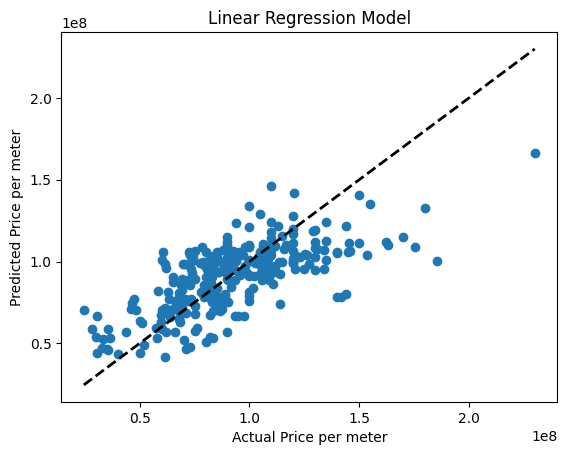

In [63]:
# Plotting the output of the model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price per meter')
plt.ylabel('Predicted Price per meter')
plt.title('Linear Regression Model')

# Plotting the linear line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [38]:



# Creating a Linear Regression model and fitting it to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the house prices for the test data
y_pred = model.predict(x_test)

# Evaluating the performance of the model using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 16162464.364545181
